## DigitalEnergy

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Timeseries singola

In [34]:
nomecompleto = "DE_KN_industrial1_pv_1"
nomelist = nomecompleto.split('_')
impianto = nomelist[2]
device = nomelist[3]

data = pd.read_csv(f"../Dataset/DigitalEnergy/{nomecompleto}.csv")
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], format='%Y-%m-%d %H:%M')
data.rename(columns={"utc_timestamp": "timestamp"}, inplace=True)
#get incremental values:
data[nomecompleto] = data[nomecompleto].diff()
data.set_index('timestamp', inplace=True)
data.head(10)

,DE_KN_industrial1_pv_1
timestamp,
2015-10-23 14:25:00,NaN
2015-10-23 14:26:00,0.002
2015-10-23 14:27:00,0.003
2015-10-23 14:28:00,0.007
2015-10-23 14:29:00,0.005
2015-10-23 14:30:00,0.005
2015-10-23 14:31:00,0.010
2015-10-23 14:32:00,0.005
2015-10-23 14:33:00,0.005


Plot

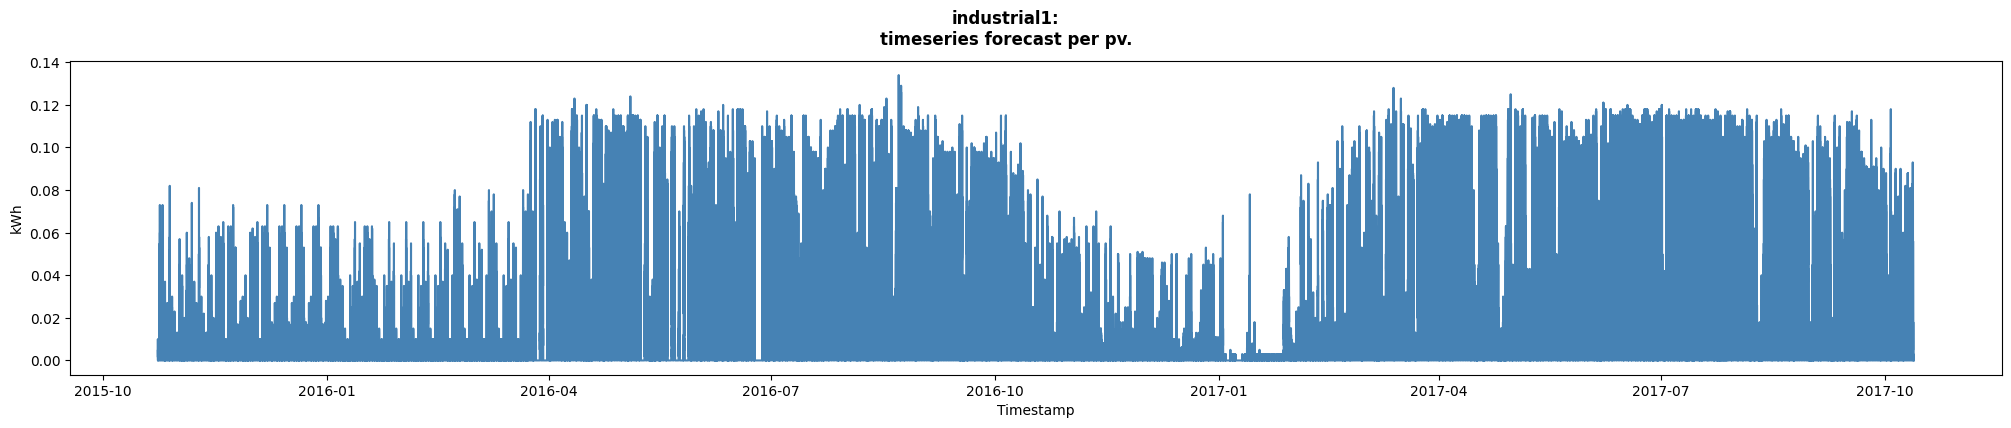

In [35]:
#ENTIRE SERIES:
fig, ax = plt.subplots(1, 1, figsize=(1920/96, 400/96), constrained_layout=True)
fig.suptitle(f"{impianto}:\ntimeseries forecast per {device}.", fontweight='bold')

ax.plot(data.index, data[nomecompleto], color='steelblue')
# ax.legend(["Actual curve", "Predicted curve"])
ax.set_ylabel("kWh")
ax.set_xlabel("Timestamp")

plt.show()

Plot zoom:

In [36]:
#CUSTOM PLOT ZOOM RANGE:
DAY_START = datetime.strptime("2017-06-10 00:00", '%Y-%m-%d %H:%M')
DAY_END = datetime.strptime("2017-07-10 23:59", '%Y-%m-%d %H:%M')

#TIME SLICING:
filt = data.copy()
filt = filt.loc[(filt.index >= DAY_START) & (filt.index <= DAY_END)]
filt.head(10)

,DE_KN_industrial1_pv_1
timestamp,
2017-06-10 00:00:00,0.0
2017-06-10 00:01:00,0.0
2017-06-10 00:02:00,0.0
2017-06-10 00:03:00,0.0
2017-06-10 00:04:00,0.0
2017-06-10 00:05:00,0.0
2017-06-10 00:06:00,0.0
2017-06-10 00:07:00,0.0
2017-06-10 00:08:00,0.0


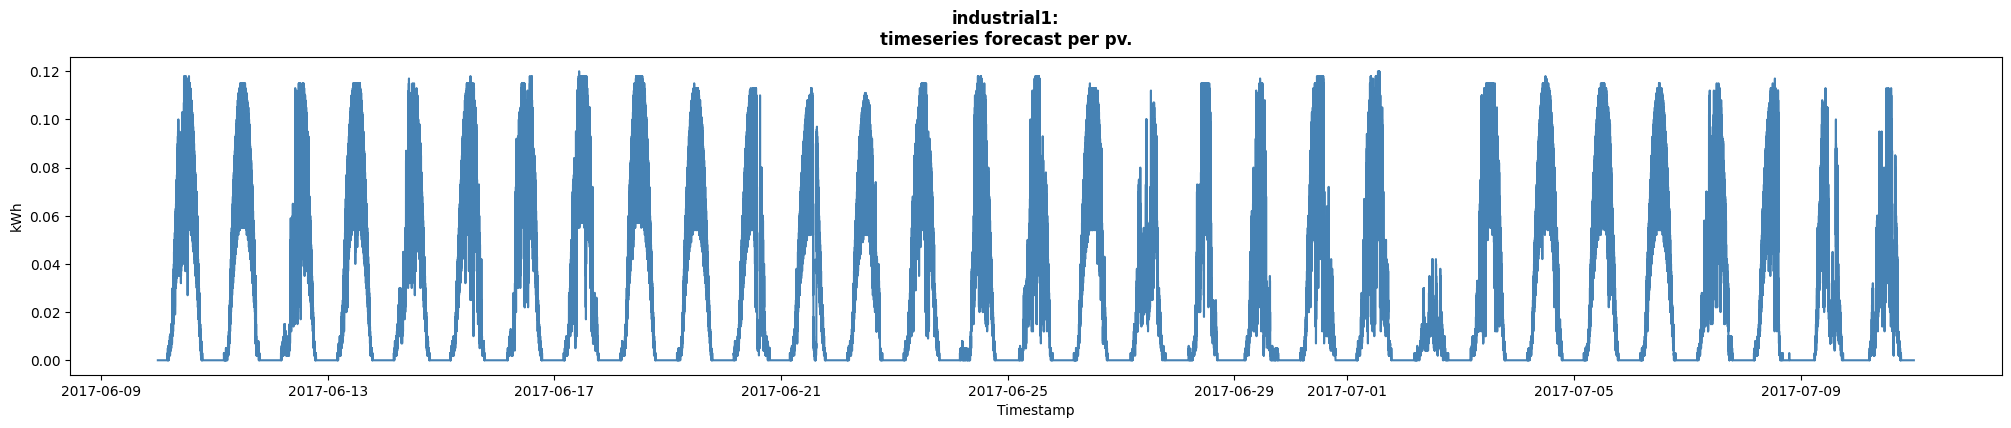

In [37]:
#ENTIRE SERIES:
fig, ax = plt.subplots(1, 1, figsize=(1920/96, 400/96), constrained_layout=True)
fig.suptitle(f"{impianto}:\ntimeseries forecast per {device}.", fontweight='bold')

ax.plot(filt.index, filt[nomecompleto], color='steelblue')
# ax.legend(["Actual curve", "Predicted curve"])
ax.set_ylabel("kWh")
ax.set_xlabel("Timestamp")

plt.show()

#DOPO aver calcolato le diff:

In [38]:
#Hybrid column: original values where preds == Nan, else preds:
data['active'] = np.where(data[nomecompleto]>0, True, False)

#identify start Cycle moments:
data['change'] = (data[nomecompleto]==0) & (data[nomecompleto].diff(periods=-1).fillna(0)<0)

data.head(20)

,DE_KN_industrial1_pv_1,active,change
timestamp,,,
2015-10-23 14:25:00,NaN,False,False
2015-10-23 14:26:00,0.002,True,False
2015-10-23 14:27:00,0.003,True,False
2015-10-23 14:28:00,0.007,True,False
2015-10-23 14:29:00,0.005,True,False
2015-10-23 14:30:00,0.005,True,False
2015-10-23 14:31:00,0.010,True,False
2015-10-23 14:32:00,0.005,True,False
2015-10-23 14:33:00,0.005,True,False
